### P - 3.55 Perform an experimental analysis of the three algorithms prefix average1, prefix average2, and prefix average3, from Section 3.3.3. Visualize their running times as a function of the input size with a log-log chart.

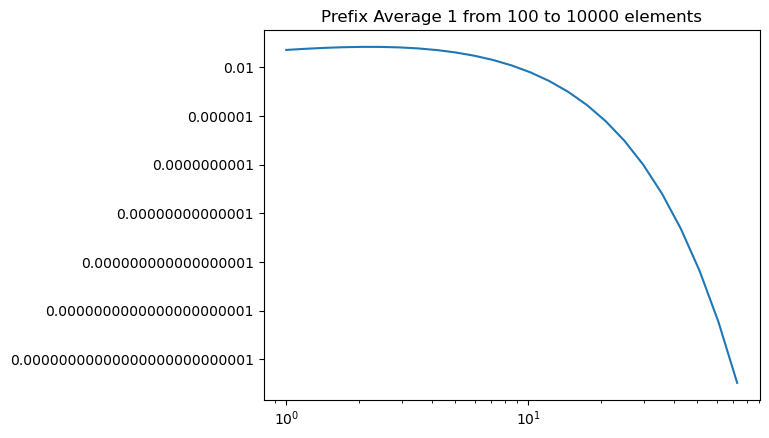

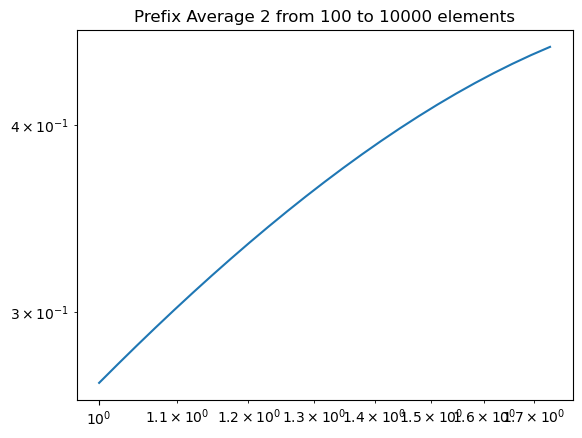

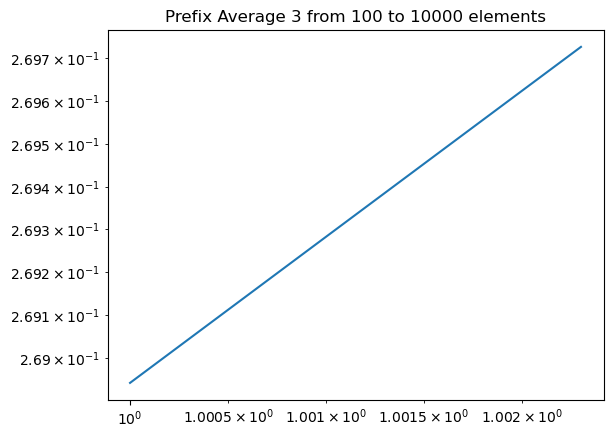

In [4]:
import time as t
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def prefixaverage1(S):
    n = len(S)
    A = [0] * n
    for j in range(n):
        total = 0
        for i in range(j+1):
            total += S[i]
        A[j] = total/(j+1)
    return A


def prefixaverage2(S):
    n = len(S)
    A = [0] * n
    for j in range(n):
        A[j] = sum(S[0:j+1])/(j+1)
    return A


def prefixaverage3(S):
    n = len(S)
    A = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        A[j] = total/(j+1)
    return A


# prefixaverage1 ---------
start_time = t.time()
prefixaverage1([j for j in range(1, 100)])
a1 = t.time()-start_time

start_time = t.time()
prefixaverage1([j for j in range(1, 10000)])
a4 = t.time()-start_time

print("\n")
# prefixaverage2 ---------
start_time = t.time()
prefixaverage2([j for j in range(1, 100)])
b1 = t.time()-start_time

start_time = t.time()
prefixaverage2([j for j in range(1, 10000)])
b4 = t.time()-start_time

print("\n")
# prefixaverage3 ---------
start_time = t.time()
prefixaverage3([j for j in range(1, 100)])
c1 = t.time()-start_time

start_time = t.time()
prefixaverage3([j for j in range(1, 10000)])
c4 = t.time()-start_time

# prefixaverage1
x = np.logspace(a1, a4, 25)
y = x ** 2 / (np.exp(x) + 1)

plt.loglog(x, y)
plt.autoscale(enable=True, axis='x')
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, _: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y), 0)))).format(y)))
plt.title("Prefix Average 1 from 100 to 10000 elements")
plt.show()

# prefixaverage2
x = np.logspace(b1, b4, 25)
y = x ** 2 / (np.exp(x) + 1)

plt.loglog(x, y)
plt.autoscale(enable=True, axis='x')
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, _: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y), 0)))).format(y)))
plt.title("Prefix Average 2 from 100 to 10000 elements")
plt.show()

# prefixaverage3
x = np.logspace(c1, c4, 25)
y = x ** 2 / (np.exp(x) + 1)

plt.loglog(x, y)
plt.autoscale(enable=True, axis='x')
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, _: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y), 0)))).format(y)))
plt.title("Prefix Average 3 from 100 to 10000 elements")
plt.show()
